# Section 3.3: M-estimator of scatter

This page contains simulations in Section 3.3: asymptotic behavior of M-estimator of scatter

## Contents

    - M-estimator of scatter and the asymptotic equivalent (Theorem 3.3)
    - Fixed-point equation for M-estimator $\hat C$ and the asymptotic equivalent $\hat S$ per Theorem 3.3
    - Limiting spectral measure of $\hat S$ (and thus of $\hat C$)
    - Robust Spiked Model in Remark 3.6


## M-estimator of scatter and the asymptotic equivalent (Theorem 3.3)

Generate a (Gaussian i.i.d.) random matrix $Z$ of dimension $p \times n$ and i.i.d. random Gamma(.5,2) vector tau Generate the associated data matrix $X = C^{\frac12} Z diag(\sqrt{\tau})$


In [41]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg
from pynverse import inversefunc  # pip install pynverse, if package not installed
pi = np.pi

In [42]:
coeff = 5
p = 100*coeff
n = 500*coeff
c = p/n

np.random.seed(928)
eigs_C = np.concatenate([np.ones(p//4),3*np.ones(p//4),10*np.ones(p//2)])
C = np.diag(eigs_C) # population covariance
tau = np.random.gamma(.5,2,n)
eigs_tilde_C = tau

Z = np.random.randn(p,n)
X = scipy.linalg.sqrtm(C)@Z@np.diag(np.sqrt(tau))

Empirical eigenvalues of the sample covariance matrix $\frac1n X X^T$ versus the solution of fixed-point equation

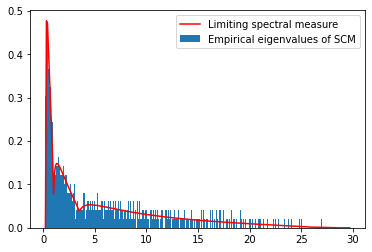

In [43]:
SCM = X@(X.T)/n
eigs_SCM = np.linalg.eigh(SCM)[0]
edges=np.linspace(np.min(eigs_SCM)*0.9,np.max(eigs_SCM)*1.1,300)

y = 1e-5
zs = edges+y*1j
mu = []

delta = np.zeros(2)+0*1j # corresponds to [delta, delta_delta] in Theorem 2.6
for z in zs:
    delta_tmp = np.ones(2)+0*1j
    #watch_dog = 1 # to avoid possible numerical convergence issue
    while np.sum(np.abs(delta-delta_tmp))>1e-6: # and watch_dog < 50
        delta_tmp[:] = delta[:]
        delta[0] = -1/n/z*np.sum(eigs_C/( 1 + delta_tmp[1]*eigs_C ))
        delta[1] = -1/n/z*np.sum(eigs_tilde_C/( 1 + delta_tmp[0]*eigs_tilde_C ))

    m = -1/p/z*np.sum(1/(1 + delta[1]*eigs_C))
    mu.append(np.imag(m)/pi)

plt.hist(eigs_SCM,bins=edges,weights=1/p/(edges[1]-edges[0])*np.ones(len(eigs_SCM)),label='Empirical eigenvalues of SCM')
plt.plot(edges,mu,'r',label='Limiting spectral measure')
_ = plt.legend()

## Fixed-point equation for M-estimator $\hat C$ and the asymptotic equivalent $\hat S$ per Theorem 3.3

In [44]:
alpha = 0.2
u = lambda x : (1+alpha)/(alpha+x)
phi = lambda x : x*u(x)
g = lambda x : x/(1-c*phi(x))
g_inv = inversefunc(g)
v = lambda x : u(g_inv(x))

hat_C_tmp = np.eye(p)
hat_C = np.eye(p)/2
while np.linalg.norm(hat_C-hat_C_tmp,2)/np.linalg.norm(hat_C,2)>1e-3:
    hat_C_tmp = hat_C
    hat_C = X@np.diag(u(np.diag(X.T@np.linalg.solve(hat_C,X)/p)))@(X.T)/n

gamma = 1
gamma_tmp = 0
while np.abs(gamma-gamma_tmp)>1e-6:
    gamma_tmp = gamma
    gamma = 1/(np.sum( tau*v(gamma*tau)/(1+c*gamma*tau*v(gamma*tau)) )/n)

hat_S = X@np.diag(v(gamma*tau))@(X.T)/n
eigs_hat_S = np.linalg.eigh(hat_S)[0]
eigs_hat_C = np.linalg.eigh(hat_C)[0]

edges=np.linspace(np.min(eigs_hat_C)*0.9,np.max(eigs_hat_C)*1.1,300)

## Limiting spectral measure of $\hat S$ (and thus of $\hat C$)

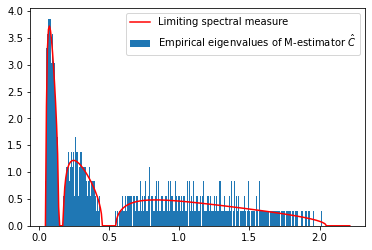

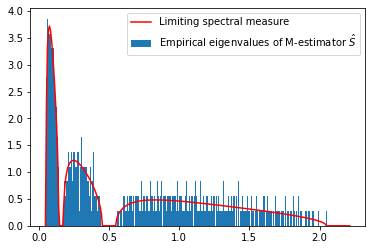

In [45]:
eigs_tilde_C = tau*v(gamma*tau)

y = 1e-5
zs = edges+y*1j
mu = []

delta = np.zeros(2)+0*1j # corresponds to [delta, delta_delta] in Theorem 2.6
for z in zs:

    delta_tmp = np.ones(2)+0*1j
    #watch_dog = 1 # to avoid possible numerical convergence issue
    while np.max(np.abs(delta-delta_tmp))>1e-6: # and watch_dog < 50
        delta_tmp[:] = delta[:]
        delta[0] = -1/n/z*np.sum(eigs_C/( 1 + delta_tmp[1]*eigs_C ))
        delta[1] = -1/n/z*np.sum(eigs_tilde_C/( 1 + delta_tmp[0]*eigs_tilde_C ))

    m = -1/p/z*np.sum(1/(1 + delta[1]*eigs_C) )
    mu.append(np.imag(m)/pi)

plt.hist(eigs_hat_C,bins=edges,weights=1/p/(edges[1]-edges[0])*np.ones(len(eigs_hat_C)),label=r'Empirical eigenvalues of M-estimator $\hat C$')
plt.plot(edges,mu,'r',label='Limiting spectral measure')
_ = plt.legend()

plt.figure()
plt.hist(eigs_hat_S,bins=edges,weights=1/p/(edges[1]-edges[0])*np.ones(len(eigs_hat_C)),label=r'Empirical eigenvalues of M-estimator $\hat S$')
plt.plot(edges,mu,'r',label='Limiting spectral measure')
_ = plt.legend()

## Robust Spiked Model in Remark 3.6

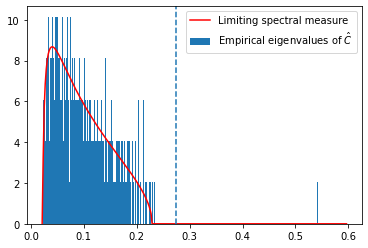

In [46]:
coeff = 2
p = 128*coeff
n = 512*coeff
c = p/n

np.random.seed(1024)
nu_student = 100  # degrees of freedom nu of Student's t distribution
t = np.random.standard_t(nu_student,n)/np.sqrt(nu_student/(nu_student-2))
tau = t**2

a = (np.concatenate([-np.ones(p//2),np.ones(p//2)])/np.sqrt(p)).reshape(p,1)
s = np.random.randn(n,1)*.65

Z = np.random.randn(p,n)
X = a@(s.T)+Z@np.diag(np.sqrt(tau))

alpha = 0.2
u = lambda x : (1+alpha)/(alpha+x)
phi = lambda x : x*u(x)
g = lambda x : x/(1-c*phi(x))
g_inv = inversefunc(g)
v = lambda x : u(g_inv(x))

hat_C_tmp = np.eye(p)
hat_C = np.eye(p)/2
while np.linalg.norm(hat_C -  hat_C_tmp,2)/np.linalg.norm(hat_C,2)>1e-3:
    hat_C_tmp = hat_C
    hat_C = X@np.diag(u(np.diag(X.T@np.linalg.inv(hat_C)@X/p)))@(X.T)/n

eigs_hat_C = np.linalg.eigh(hat_C)[0]
edges=np.linspace(np.min(eigs_hat_C)*0.9,np.max(eigs_hat_C)*1.1,300)

gamma = 1
gamma_tmp = 0
while np.abs(gamma-gamma_tmp)>1e-6:
    gamma_tmp = gamma
    gamma = 1/(np.sum( tau*v(gamma*tau)/(1+c*gamma*tau*v(gamma*tau)) )/n)

eigs_C = np.ones(p)
eigs_tilde_C = tau*v(gamma*tau)

y = 1e-5
zs = edges+y*1j
mu = []

delta = np.zeros(2)+0*1j
for z in zs:

    delta_tmp = np.ones(2)+0*1j
    while np.sum(np.abs(delta-delta_tmp))>1e-6:
        delta_tmp[:] = delta[:]
        delta[0] = -1/n/z*np.sum(eigs_C/( 1 + delta_tmp[1]*eigs_C ))
        delta[1] = -1/n/z*np.sum(eigs_tilde_C/( 1 + delta_tmp[0]*eigs_tilde_C ))

    m = -1/p/z*np.sum(1/(1 + delta[1]*eigs_C))
    mu.append(np.imag(m)/pi)

S_plus = (1+alpha)/(1-c*(1+alpha))*(1+np.sqrt(c))**2/gamma

plt.hist(eigs_hat_C,bins=edges,weights=1/p/(edges[1]-edges[0])*np.ones(len(eigs_hat_C)),label=r'Empirical eigenvalues of $\hat C$')
plt.plot(edges,mu,'r',label='Limiting spectral measure')
plt.axvline(x=S_plus,ls='--')
_ = plt.legend()